In [18]:
#les importations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score ,confusion_matrix
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
#chargement des données
df=pd.read_csv("../data/df_features.csv")
df=df.drop(columns=["Unnamed: 0"],errors='ignore')


In [12]:
#séparation
X=df.drop(columns=["etiquette"])
y=df["etiquette"]

In [13]:
#Split
from sklearn.discriminant_analysis import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Entrainement
model = RandomForestClassifier(n_estimators=100 , random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9885895997007108
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2455
           1       0.99      0.99      0.99      2891

    accuracy                           0.99      5346
   macro avg       0.99      0.99      0.99      5346
weighted avg       0.99      0.99      0.99      5346



<Axes: >

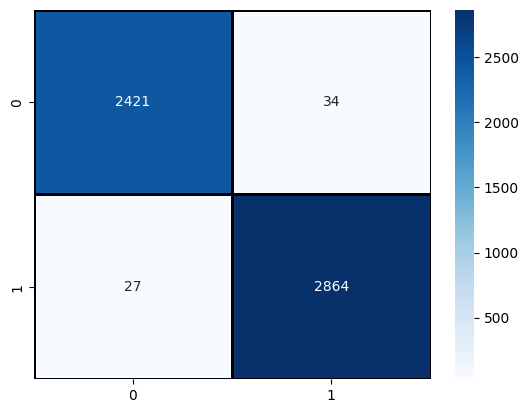

In [19]:
#Prédiction et évaluation
y_pred = model.predict(X_test)
print("Accuracy:" , accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

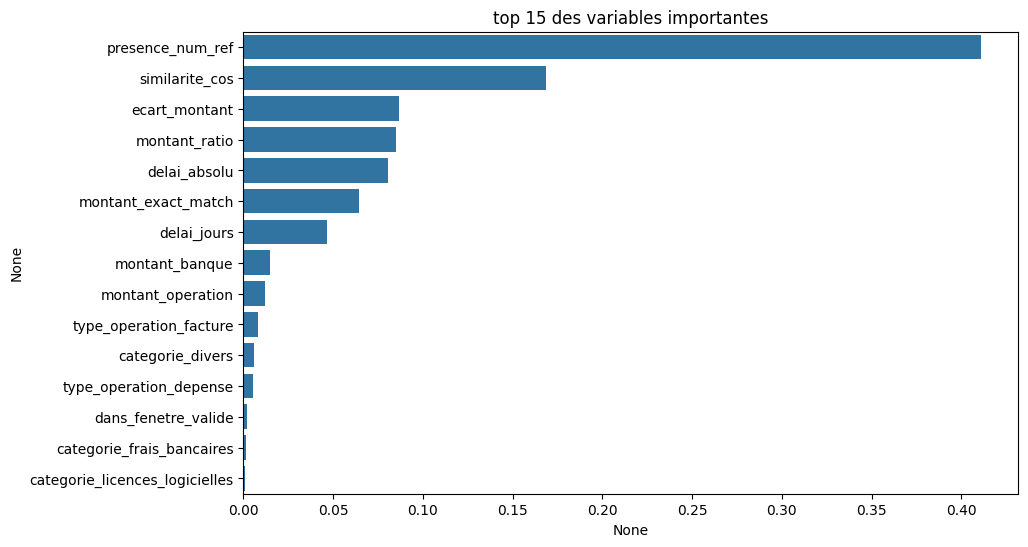

In [16]:
#Importance des features
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("top 15 des variables importantes")

plt.show()

In [20]:
#sauvegarde du modèle 
joblib.dump(model,"random_forest_model.pkl")

['random_forest_model.pkl']